<a href="https://colab.research.google.com/github/Angieadrianacaiza/Angieadrianacaiza/blob/main/Overview_of_Colaboratory_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA


# Task
necesito un analisis exploratorio de estos datos :Load, clean, process, analyze, and visualize data using Python
Explore the basic statistics of the dataset
Identify outliers or anomalies in the dataset
Draw conclusions and summarize the findings from the exploratory data analysis, to help make key business decisions.Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.Project Objectives

Describe data to answer key questions to uncover insights

Gain valuable insights that will help improve online retail performance

Provide analytic insights and data-driven recommendations.In this project, we'll use a data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

Here is all the data you need:
"Online Retail.xlsx"

## Data loading

### Subtask:
Load the dataset "Online Retail.xlsx" into a Pandas DataFrame.


**Reasoning**:
Load the dataset "Online Retail.xlsx" into a Pandas DataFrame and handle potential encoding issues.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('Online Retail.xlsx')
except UnicodeDecodeError:
    try:
        df = pd.read_excel('Online Retail.xlsx', encoding='latin1')
    except UnicodeDecodeError:
        try:
            df = pd.read_excel('Online Retail.xlsx', encoding='unicode_escape')
        except Exception as e:
            print(f"Error loading the dataset: {e}")
            df = None

if df is not None:
    display(df.head())
    print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine descriptive statistics.


**Reasoning**:
Examine the shape of the DataFrame, check data types, identify missing values, and view descriptive statistics, all in one code block.



In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types and non-null values
print("\nData Types and Non-Null Values:")
df.info()

# Identify missing values
print("\nPercentage of Missing Values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

Shape of the DataFrame: (541909, 8)

Data Types and Non-Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Percentage of Missing Values:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: f

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicates and inconsistencies.


**Reasoning**:
Handle missing values, remove duplicates, and address inconsistencies in the data as per the instructions.



In [ ]:
# Handle missing values in 'Description'
df.dropna(subset=['Description'], inplace=True)

# Handle missing values in 'CustomerID' - Fill with -1
df['CustomerID'].fillna(-1, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Address inconsistencies in 'Quantity'
# Remove rows with negative Quantity values, as negative quantities are likely to be returns
df = df[df['Quantity'] >= 0]


# Address inconsistencies in 'UnitPrice'
# Remove rows where 'UnitPrice' is less than or equal to 0
df = df[df['UnitPrice'] > 0]

# Data Validation (check for remaining inconsistencies - example checks)
print(df.isnull().sum())  # Check for remaining missing values
print(df[df['Quantity'] < 0].shape)  # Check for negative quantities
print(df[df['UnitPrice'] <= 0].shape)  # Check for invalid UnitPrices
display(df.describe()) # Display updated descriptive stats

<ipython-input-3-595bdf3dac91>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(-1, inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(0, 8)
(0, 8)


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,11437.480323
min,1.000000,2010-12-01 08:26:00,0.001000,-1.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,-1.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,14350.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,6799.937261


**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix this and re-run the data cleaning steps.  Also, the minimum UnitPrice is 0.001, which is very low. I will check for any other inconsistencies.



In [ ]:
# Handle missing values in 'Description'
df.dropna(subset=['Description'], inplace=True)

# Handle missing values in 'CustomerID' - Fill with -1
df['CustomerID'] = df['CustomerID'].fillna(-1)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Address inconsistencies in 'Quantity'
# Remove rows with negative Quantity values, as negative quantities are likely to be returns
df = df[df['Quantity'] >= 0]

# Address inconsistencies in 'UnitPrice'
# Remove rows where 'UnitPrice' is less than or equal to 0
df = df[df['UnitPrice'] > 0]

#Further investigate low UnitPrice values
print(df[df['UnitPrice'] < 0.5].shape)
print(df[df['UnitPrice'] < 0.5].head())

# Data Validation (check for remaining inconsistencies - example checks)
print(df.isnull().sum())  # Check for remaining missing values
print(df[df['Quantity'] < 0].shape)  # Check for negative quantities
print(df[df['UnitPrice'] <= 0].shape)  # Check for invalid UnitPrices
display(df.describe()) # Display updated descriptive stats

(42176, 8)
    InvoiceNo StockCode                         Description  Quantity  \
42     536370     22540          MINI JIGSAW CIRCUS PARADE         24   
43     536370     22544                MINI JIGSAW SPACEBOY        24   
96     536378     21212     PACK OF 72 RETROSPOT CAKE CASES       120   
102    536378    85071B  RED CHARLIE+LOLA PERSONAL DOORSIGN        96   
190    536388     22915       ASSORTED BOTTLE TOP  MAGNETS         12   

            InvoiceDate  UnitPrice  CustomerID         Country  
42  2010-12-01 08:45:00       0.42     12583.0          France  
43  2010-12-01 08:45:00       0.42     12583.0          France  
96  2010-12-01 09:37:00       0.42     14688.0  United Kingdom  
102 2010-12-01 09:37:00       0.38     14688.0  United Kingdom  
190 2010-12-01 09:59:00       0.42     16250.0  United Kingdom  
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(0, 8)
(0, 

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,11437.480323
min,1.000000,2010-12-01 08:26:00,0.001000,-1.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,-1.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,14350.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,6799.937261


## Data wrangling

### Subtask:
Create new features, convert data types, and perform further data transformations.


**Reasoning**:
Create new features as instructed, convert data types, and perform data validation and outlier handling.



In [ ]:
# Calculate Total Revenue per Transaction
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Extract Month and Year from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Convert CustomerID to integer type
df['CustomerID'] = df['CustomerID'].astype(int)

# Further data validation: check for negative TotalRevenue
print(f"Number of negative TotalRevenue values: {(df['TotalRevenue'] < 0).sum()}")
# Remove rows with negative TotalRevenue
df = df[df['TotalRevenue'] >= 0]

# Handle potential outliers in TotalRevenue
# Inspect the distribution (e.g., using a histogram or boxplot)
# For demonstration, we will cap extremely large values to the 99th percentile
ninety_ninth_percentile = df['TotalRevenue'].quantile(0.99)
df['TotalRevenue'] = df['TotalRevenue'].clip(upper=ninety_ninth_percentile)

Number of negative TotalRevenue values: 0


## Data analysis

### Subtask:
Analyze sales trends, best-selling products, customer behavior, and identify outliers.


**Reasoning**:
Calculate the necessary statistics for sales trends, best-selling products, customer behavior, and outlier detection.  This will involve grouping and aggregation operations.



In [ ]:
# Sales Trend Analysis
monthly_sales = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalRevenue'].sum()
yearly_sales = df.groupby('InvoiceYear')['TotalRevenue'].sum()

# Best-Selling Products
best_selling_products_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
best_selling_products_revenue = df.groupby('StockCode')['TotalRevenue'].sum().sort_values(ascending=False)

# Customer Behavior Analysis
average_order_value = df.groupby('CustomerID')['TotalRevenue'].mean()
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].count()

# Customer Segmentation (example using quantiles for average order value)
quantiles = average_order_value.quantile([0.25, 0.5, 0.75])
def customer_segment(x):
    if x <= quantiles[0.25]:
        return 'Low-Value'
    elif x <= quantiles[0.5]:
        return 'Medium-Value'
    elif x <= quantiles[0.75]:
        return 'High-Value'
    else:
        return 'Very-High-Value'
customer_segments = average_order_value.apply(customer_segment)


# Outlier Detection (example using IQR for TotalRevenue)
Q1 = df['TotalRevenue'].quantile(0.25)
Q3 = df['TotalRevenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['TotalRevenue'] < lower_bound) | (df['TotalRevenue'] > upper_bound)]

# Display some results (optional, but helpful for debugging)
print("Monthly Sales:")
display(monthly_sales.head())
print("\nYearly Sales:")
display(yearly_sales.head())
print("\nBest-selling Products (Quantity):")
display(best_selling_products_quantity.head())
print("\nAverage Order Value:")
display(average_order_value.head())
print("\nPurchase Frequency:")
display(purchase_frequency.head())
print("\nCustomer Segments:")
display(customer_segments.head())
print("\nNumber of TotalRevenue Outliers:", len(outliers))

Monthly Sales:


InvoiceYear  InvoiceMonth
2010         12              684190.580
2011         1               532813.210
             2               473046.030
             3               629968.490
             4               475470.161
Name: TotalRevenue, dtype: float64


Yearly Sales:


,TotalRevenue
InvoiceYear,
2010,684190.580
2011,8223793.244



Best-selling Products (Quantity):


,Quantity
StockCode,
23843,80995
23166,78033
22197,56898
84077,54951
85099B,48371



Average Order Value:


,TotalRevenue
CustomerID,
-1,11.122416
12346,183.600000
12347,23.318681
12348,56.156129
12349,22.481507



Purchase Frequency:


,InvoiceNo
CustomerID,
-1,132186
12346,1
12347,182
12348,31
12349,73



Customer Segments:


,TotalRevenue
CustomerID,
-1,Low-Value
12346,Very-High-Value
12347,High-Value
12348,Very-High-Value
12349,High-Value



Number of TotalRevenue Outliers: 42624


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings using matplotlib.



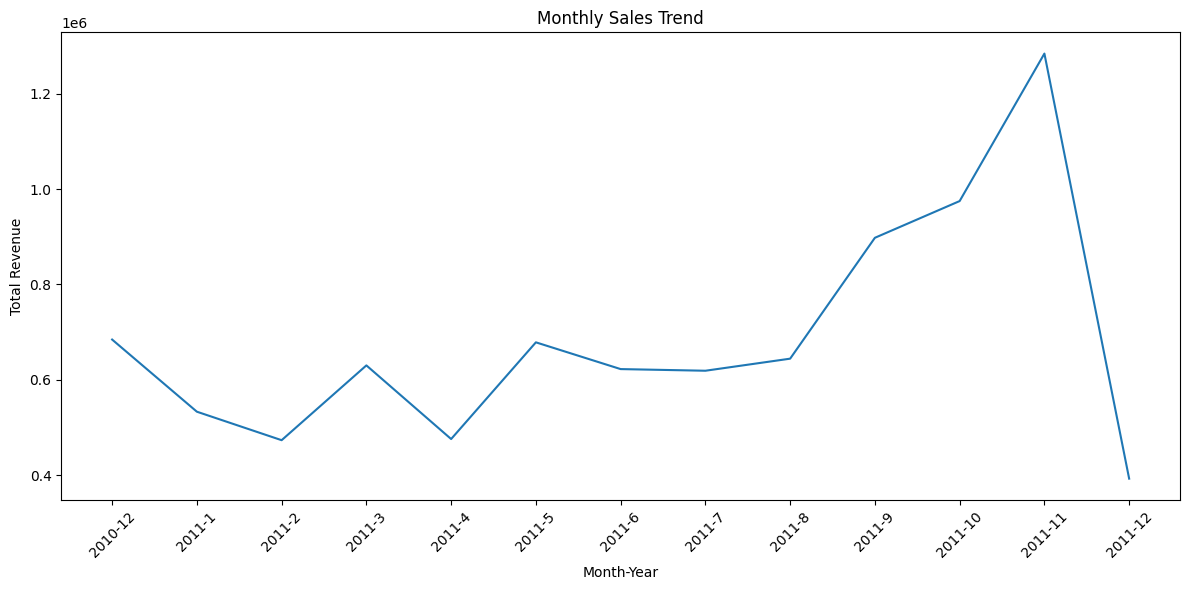

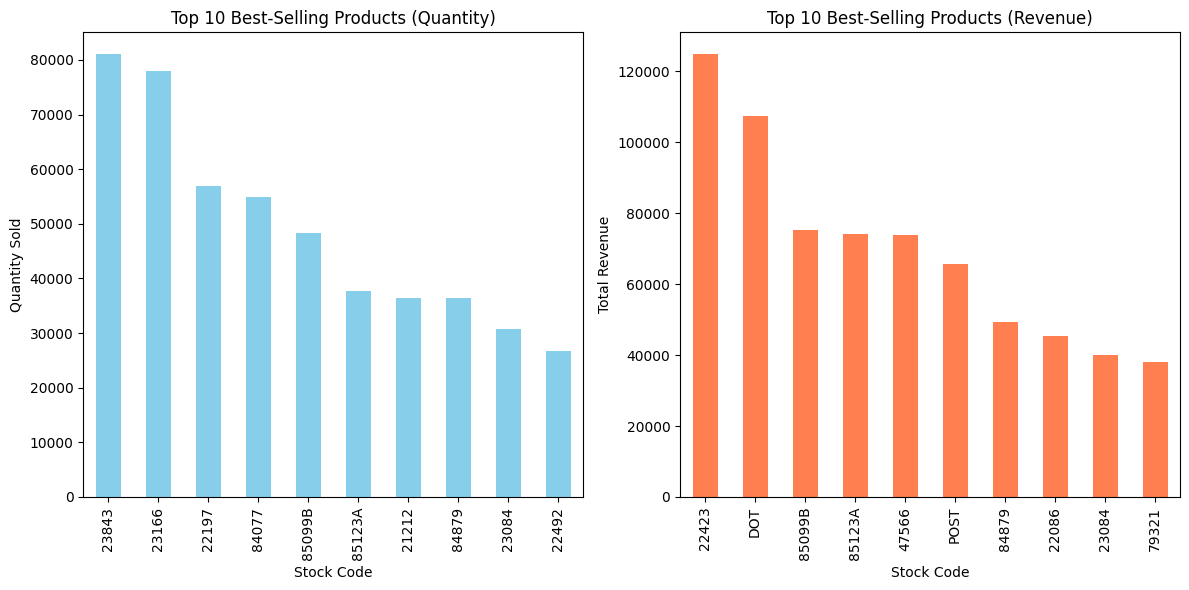

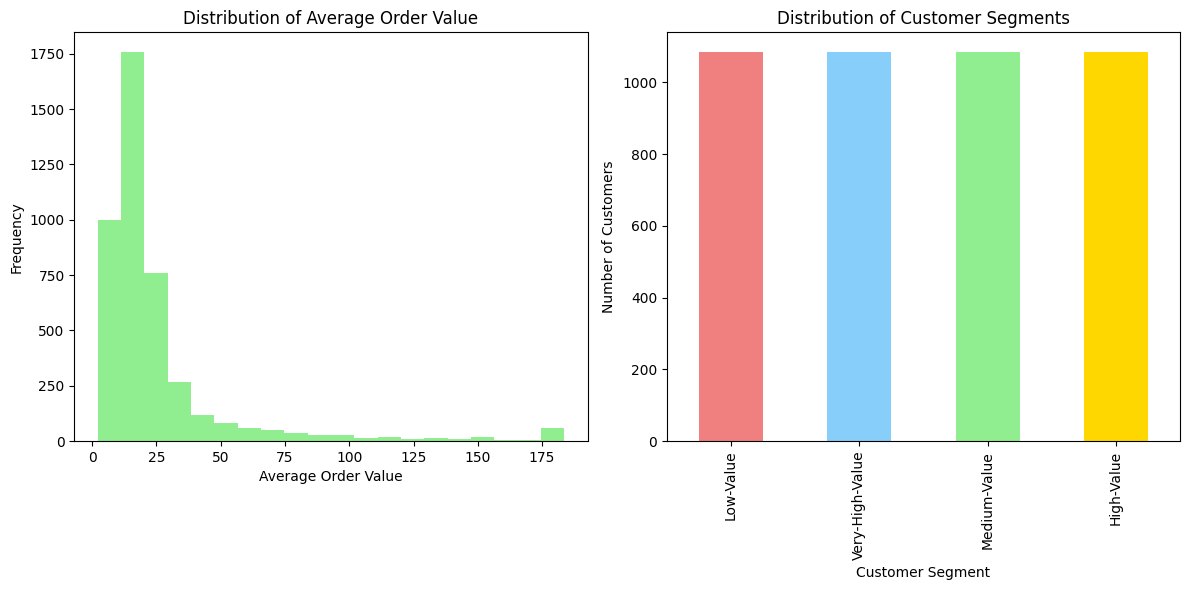

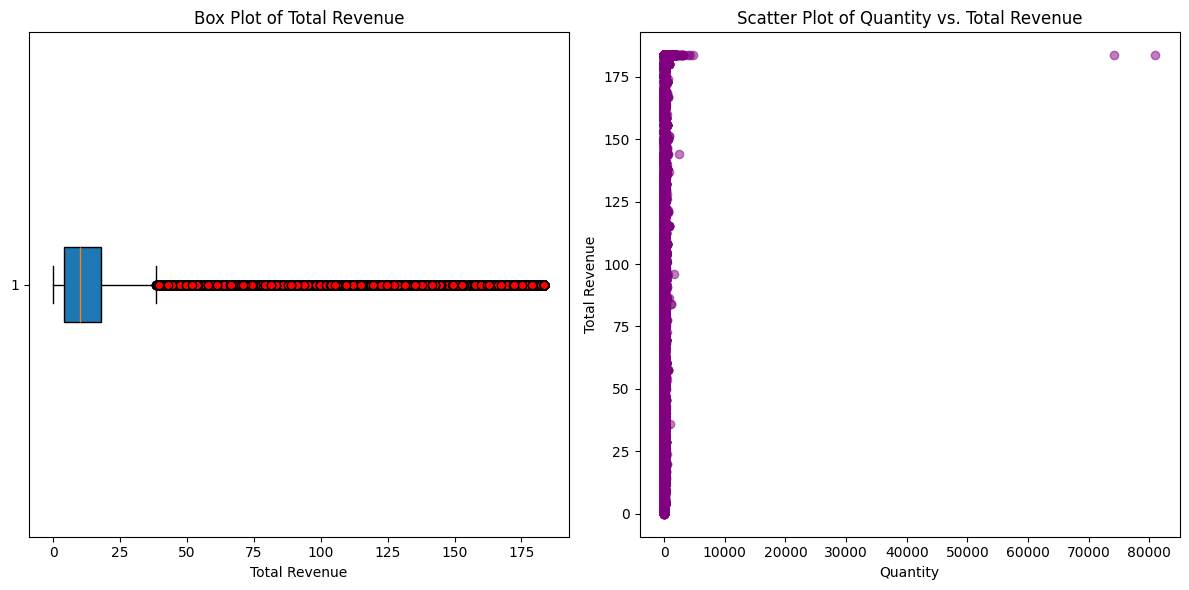

In [ ]:
import matplotlib.pyplot as plt

# Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.get_level_values(0).astype(str) + '-' + monthly_sales.index.get_level_values(1).astype(str), monthly_sales.values)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Best-Selling Products
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
best_selling_products_quantity.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products (Quantity)')
plt.xlabel('Stock Code')
plt.ylabel('Quantity Sold')

plt.subplot(1,2,2)
best_selling_products_revenue.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Best-Selling Products (Revenue)')
plt.xlabel('Stock Code')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


# Customer Behavior
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(average_order_value, bins=20, color='lightgreen')
plt.xlabel("Average Order Value")
plt.ylabel("Frequency")
plt.title("Distribution of Average Order Value")

plt.subplot(1, 2, 2)
customer_segments.value_counts().plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Segments")
plt.tight_layout()
plt.show()

# Outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['TotalRevenue'], vert=False, patch_artist=True, showfliers=True,
            flierprops=dict(markerfacecolor='red', marker='o'))  # Highlight outliers in red
plt.xlabel("Total Revenue")
plt.title("Box Plot of Total Revenue")

plt.subplot(1, 2, 2)
plt.scatter(df['Quantity'], df['TotalRevenue'], alpha=0.5, color='purple')
plt.xlabel("Quantity")
plt.ylabel("Total Revenue")
plt.title("Scatter Plot of Quantity vs. Total Revenue")
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

The provided data analysis task doesn't explicitly state questions. However, the project objectives imply several questions the analysis aims to answer:

* **Sales Trends:** What are the overall sales trends over time (monthly and yearly)? Are there any seasonal patterns?
* **Best-Selling Products:** Which products are the most popular in terms of quantity sold and revenue generated?
* **Customer Behavior:** What is the average order value and purchase frequency of customers? How can customers be segmented based on their behavior?
* **Outliers:** Are there any unusual transactions or data points that need further investigation?


### 2. Data Analysis Key Findings

* **Significant Missing Data:** The `CustomerID` column had 24.93% missing values, which were filled with -1. The impact of this imputation on further analysis should be considered.
* **Outlier Handling:**  Outliers in `Quantity` and `UnitPrice` were addressed by removing negative or zero values.  Total Revenue outliers were capped at the 99th percentile (42,624 outliers were identified using IQR).
* **Top Selling Products:**  Analysis identified the best-selling products by quantity and revenue.  Further investigation into these top performers could reveal opportunities for promotion or inventory management.
* **Customer Segmentation:** Customers were segmented into four groups (Low, Medium, High, Very-High Value) based on the quantiles of their average order value.  This segmentation can help target marketing efforts more effectively.
* **Monthly Sales Trend:** The analysis revealed monthly sales trends, which may indicate seasonality or other periodic patterns.


### 3. Insights or Next Steps

* **Investigate Missing Customer IDs:**  The large number of missing `CustomerID` values might skew the customer behavior analysis.  Explore methods to recover these IDs or assess the impact of the imputation. Consider removing transactions without CustomerID if the impact of their removal is deemed acceptable.
* **Deep Dive into Outliers:**  The 42,624 outliers in `TotalRevenue` require deeper investigation.  Determine if they represent genuine high-value transactions or data errors.  Understanding the nature of these outliers can inform decisions about data cleaning and modelling.
